In [1]:
from matplotlib import pyplot as plt
from numpy import average, sqrt, array  # noqa
from numpy.linalg import norm

from monte_carlo import monte_carlo

count = 100
N = 100000
rho = 0.8442
temp = 0.728
size = sqrt(count/rho)
sim = monte_carlo(maxstep=N, temp=temp, count=count,
                  size=size, mode='periodic', dimension=2, rand=True)
c = array([0.5*size]*2)


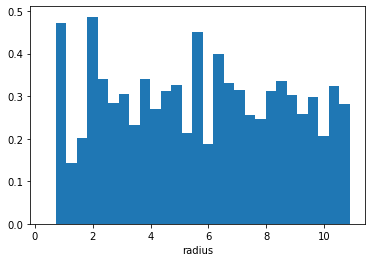

In [4]:
import numpy as np
particles = array(
                  [i for i in sim.phy_sys.particles] +
                  [i+array([size, 0]) for i in sim.phy_sys.particles] +
                  [i+array([-size, 0]) for i in sim.phy_sys.particles] +
                  [i+array([0, size]) for i in sim.phy_sys.particles] +
                  [i+array([0, -size]) for i in sim.phy_sys.particles] +
                  [i+array([size, -size]) for i in sim.phy_sys.particles]+ 
                  [i+array([size, size]) for i in sim.phy_sys.particles]+ 
                  [i+array([-size, -size]) for i in sim.phy_sys.particles]+ 
                  [i+array([-size, -size]) for i in sim.phy_sys.particles]
                  )

(array([3.02644951, 0.58576011, 0.        , 0.92862431, 0.78314921,
        1.44469212, 0.65535725, 0.61788716, 0.56180874, 0.52270318,
        0.72689273, 1.5893319 , 0.21307205, 0.61910509, 0.39270321,
        1.2604246 , 1.39553267, 0.33773115, 0.48323873, 0.76809968,
        0.87269245, 1.27445177, 0.54309494, 0.25847441, 1.00241448,
        0.24557588, 0.94105284, 0.80031325, 0.44133322, 0.64805184,
        1.15191959, 0.81115516, 0.19913417, 0.86743288, 0.65755729,
        1.00343967, 0.62322017, 0.61309491, 0.85269032, 0.58347784,
        0.97734953, 0.47937825, 1.3251154 , 0.60884972, 0.44697883,
        0.80548213, 0.57514973, 0.98796762, 0.89685159, 0.67758978]),
 array([ 0.91241665,  1.1118427 ,  1.31126875,  1.5106948 ,  1.71012085,
         1.9095469 ,  2.10897295,  2.308399  ,  2.50782505,  2.7072511 ,
         2.90667715,  3.1061032 ,  3.30552925,  3.5049553 ,  3.70438135,
         3.9038074 ,  4.10323345,  4.3026595 ,  4.50208555,  4.7015116 ,
         4.90093765,  5.10

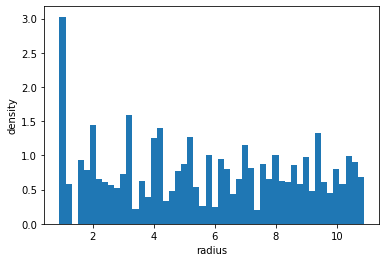

In [28]:
c = sim.phy_sys.particles[5]
r = norm(particles - c, axis = 1)
r = r[(r<=(size))*(r!=0)]
plt.xlabel('radius')
plt.ylabel('density')
bins=50
plt.hist(r, bins=bins, weights=1/(2*np.pi*r)/size*bins)
# plt.savefig('fig/exp1_rdf_peri_1.eps')

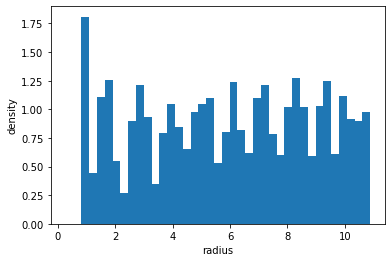

In [19]:
c = sim.phy_sys.particles[10]
r = norm(particles - c, axis = 1)
r = r[r<=(size)]
plt.xlabel('radius')
plt.ylabel('density')
bins=40
plt.hist(r, bins=bins, weights=1/(2*np.pi*r)/size*bins)
plt.savefig('fig/exp1_rdf_peri_2.eps')

In [38]:
size

10.883719140805654

In [35]:
sim.phy_sys.get_potential_energy_for_one(1)

-1.2519684595104197

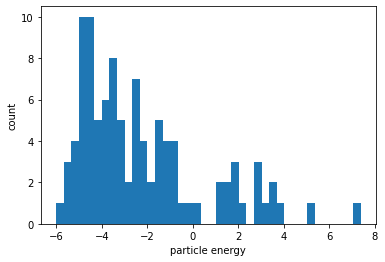

In [104]:
e = []
for i in range(100):
    e.append(sim.phy_sys.get_potential_energy_for_one(i))
plt.hist(e, bins=40)
plt.xlabel('particle energy')
plt.ylabel('count')
plt.savefig('fig/per_2.eps')

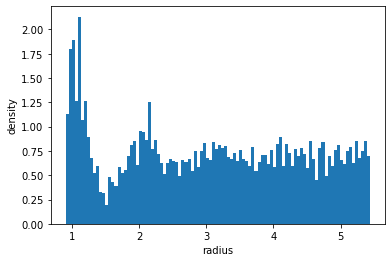

In [84]:
r = np.array([])
f = 2
for i in range(100):
    c = sim.phy_sys.particles[i]
    r1 = norm(particles - c, axis = 1)
    r1 = r1[(r1<=(size/f))*(r1!=0)]
    r = np.append(r, r1)
plt.xlabel('radius')
plt.ylabel('density')
bins=100
a,b,c= plt.hist(r, bins=bins, weights=1/(2*np.pi*r)/(size/f)*bins/100)
plt.savefig('fig/exp1_rdf_peri_1.eps')

In [107]:
g = np.zeros_like(a)
for i in range(a.size):
    g[i] = (b[i] + b[i+1])/2
from lennard_jones_potential.lennard_jones import lennard_jones
a = a[g<=2.5]
np.sum(lennard_jones(g, r_c = 2.5)*a)/2

-2.100200457541684

In [96]:
a.size

100

In [109]:
sim.phy_sys.get_potential_energy()

-119.70535098548584

In [108]:
for i in range(10000):
    sim.phy_sys.Metropolis_iter(1)